In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [2]:
df = pd.read_csv('/home/hadoop/Workspace/exp_3/input/application_data.csv')

In [3]:
df_1 = df[df['TARGET'] == 0]
df_1.shape

(282686, 60)

In [4]:
df = df[['SK_ID_CURR','TARGET','AMT_INCOME_TOTAL','NAME_EDUCATION_TYPE','AMT_CREDIT','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE','NAME_CONTRACT_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE']]

In [5]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
AMT_INCOME_TOTAL              0
NAME_EDUCATION_TYPE           0
AMT_CREDIT                    0
NAME_HOUSING_TYPE             0
NAME_FAMILY_STATUS            0
NAME_INCOME_TYPE              0
NAME_CONTRACT_TYPE            0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
ORGANIZATION_TYPE             0
dtype: int64

In [6]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)
print(df)

        SK_ID_CURR  TARGET  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0           100002       1          202500.0  Secondary / secondary special   
1           100003       0          270000.0               Higher education   
2           100004       0           67500.0  Secondary / secondary special   
3           100006       0          135000.0  Secondary / secondary special   
4           100007       0          121500.0  Secondary / secondary special   
...            ...     ...               ...                            ...   
307506      456251       0          157500.0  Secondary / secondary special   
307507      456252       0           72000.0  Secondary / secondary special   
307508      456253       0          153000.0               Higher education   
307509      456254       1          171000.0  Secondary / secondary special   
307510      456255       0          157500.0               Higher education   

        AMT_CREDIT  NAME_HOUSING_TYPE    NAME_FAMIL

In [7]:
label_encoder = preprocessing.LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = label_encoder.fit_transform(df[i])
df

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,AMT_CREDIT,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,202500.0,4,406597.5,1,3,7,0,0.018801,-9461,-637,-3648.0,-2120,6,10,5
1,100003,0,270000.0,1,1293502.5,1,1,4,0,0.003541,-16765,-1188,-1186.0,-291,1,11,39
2,100004,0,67500.0,4,135000.0,1,3,7,1,0.010032,-19046,-225,-4260.0,-2531,1,9,11
3,100006,0,135000.0,4,312682.5,1,0,7,0,0.008019,-19005,-3039,-9833.0,-2437,6,17,5
4,100007,0,121500.0,4,513000.0,1,3,7,0,0.028663,-19932,-3038,-4311.0,-3458,4,11,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,4,254700.0,5,2,7,0,0.032561,-9327,-236,-8456.0,-1982,4,15,43
307507,456252,0,72000.0,4,269550.0,1,5,3,0,0.025164,-20775,365243,-4388.0,-4090,1,8,57
307508,456253,0,153000.0,1,677664.0,1,2,7,0,0.005002,-14966,-7921,-6737.0,-5150,4,9,39
307509,456254,1,171000.0,4,370107.0,1,1,1,0,0.005313,-11961,-4786,-2562.0,-931,6,9,3


In [8]:
numerical= df.drop(['TARGET'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'AMT_CREDIT',
       'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE',
       'NAME_CONTRACT_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')


Categorical Columns: Index([], dtype='object')


In [9]:
def normalize_df(df,normalization='standard'):
    if normalization == 'standard':
        normalizer = preprocessing.StandardScaler()
    else:
        raise ValueError('No such option')
    numeric_cols = df.select_dtypes(include=['float64','int64']).columns
    numeric_cols  = numeric_cols[2:]
    print(numeric_cols)
    df[numeric_cols] = normalizer.fit_transform(df[numeric_cols])
    return df

In [10]:
normalize_df(df,normalization='standard')
df

Index(['AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'AMT_CREDIT',
       'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE',
       'NAME_CONTRACT_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')


,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,AMT_CREDIT,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,0.142129,0.625006,-0.478095,-0.305298,1.306965,0.915580,-0.324395,-0.149452,1.506880,-0.456215,0.379837,0.579154,1.353458,-0.631821,-1.194830
1,100003,0,0.426792,-1.684905,1.725450,-0.305298,-0.404071,-0.263424,-0.324395,-1.252750,-0.166821,-0.460115,1.078697,1.790855,-0.972656,-0.325620,0.466663
2,100004,0,-0.427196,0.625006,-1.152888,-0.305298,1.306965,0.915580,3.082659,-0.783451,-0.689509,-0.453299,0.206116,0.306869,-0.972656,-0.938022,-0.901625
3,100006,0,-0.142533,0.625006,-0.711430,-0.305298,-1.259589,0.915580,-0.324395,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,1.353458,1.511587,-1.194830
4,100007,0,-0.199466,0.625006,-0.213734,-0.305298,1.306965,0.915580,-0.324395,0.563570,-0.892535,-0.473210,0.191639,-0.307263,0.423012,-0.325620,0.368928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,-0.047646,0.625006,-0.855489,3.900063,0.451447,0.915580,-0.324395,0.845396,1.537586,-0.453377,-0.984955,0.670578,0.423012,0.899185,0.662133
307507,456252,0,-0.408219,0.625006,-0.818594,-0.305298,3.018001,-0.656425,-0.324395,0.310593,-1.085707,2.133617,0.169782,-0.725959,-0.972656,-1.244224,1.346277
307508,456253,0,-0.066623,-1.684905,0.195379,-0.305298,0.451447,0.915580,-0.324395,-1.147120,0.245417,-0.507774,-0.497002,-1.428203,0.423012,-0.938022,0.466663
307509,456254,1,0.009287,0.625006,-0.568757,-0.305298,-0.404071,-1.442428,-0.324395,-1.124635,0.934008,-0.485583,0.688107,1.366859,1.353458,-0.938022,-1.292565


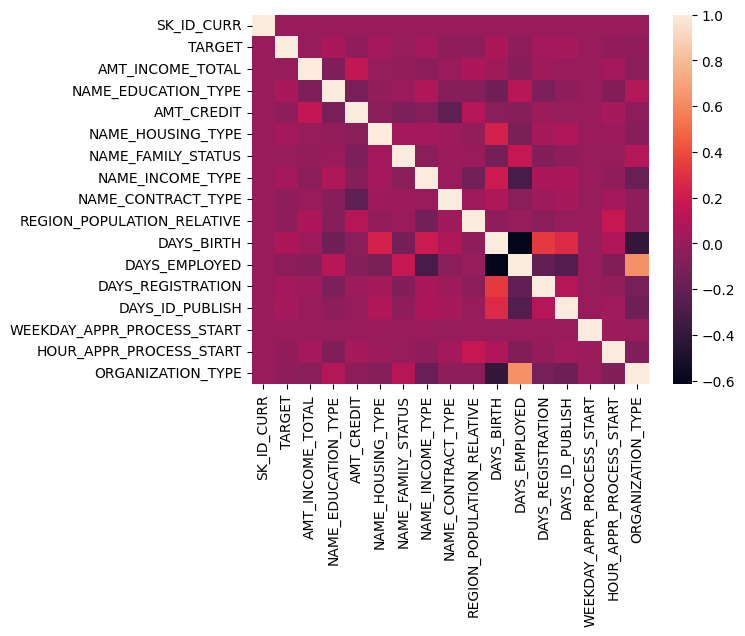

In [11]:
ax = sns.heatmap(df.corr(),annot=False)
plt.show()
# cor = df.corr()
# cor

In [12]:
X  = df.drop(['SK_ID_CURR','TARGET'],axis=1)
y = df.TARGET

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
y_test.dtype

dtype('int64')

In [14]:
# y_t = y_test.copy()
# y_t = np.full(y_test.shape,-1,dtype='int64')
y_t = pd.DataFrame({'y':[-1]*len(y_test)},index=y_test.index)

In [15]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_t], axis=1)
test_data_2 = pd.concat([X_test, y_test], axis=1)


In [18]:
train_data.to_csv("train.csv", index=False, header=None, sep=' ')
test_data.to_csv("test.csv", index=False, header=None, sep=' ')
test_data_2.to_csv("test_original.csv",index=False, header=None, sep=' ')

In [17]:
column_names = ['AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'AMT_CREDIT',
       'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE',
       'NAME_CONTRACT_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE','TARGET']
train_data.columns = column_names

In [20]:
test_data.columns = column_names
test_data_2.columns = column_names
train_data.to_csv(r"/home/hadoop/Workspace/exp_4/input/train.csv", index=False)
test_data.to_csv(r"/home/hadoop/Workspace/exp_4/input/test.csv", index=False)
test_data_2.to_csv(r"/home/hadoop/Workspace/exp_4/input/test_original.csv",index=False)

In [4]:
def csv_train_test_split(csv_file, test_size=0.2):
    # 读取CSV文件
    data = pd.read_csv(csv_file)

    # 提取特征和标签
    X = data.iloc[:, :-1]  # 特征
    y = data.iloc[:, -1]   # 标签

    # 将数据集划分为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    # 将划分后的数据集写入CSV文件
    train_data = pd.concat([X_train, y_train], axis=1)
    test_data = pd.concat([X_test, y_test], axis=1)

    train_data.to_csv("train.txt", index=False, header=None, sep=' ')
    test_data.to_csv("test.txt", index=False, header=None, sep=' ')

In [ ]:
csv_train_test_split('/home/hadoop/Workspace/exp_2/exp_2_1/input/application_data.csv', test_size=0.2)